In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('stayzilla_sample.csv')
df

,additional_info,amenities,check_in_date,check_out_date,city,country,crawl_date,description,highlight_value,hotel_star_rating,...,query_time_stamp,room_price,room_types,search_term,service_value,similar_hotel,sitename,things_to_do,things_to_note,uniq_id
0,Acceptance Rate:100 percent|Response Time:< 6 ...,Newspaper,04-08-2016,05-08-2016,Kalimpong,India,2016-07-20,Sangsey Valley Resort is Located at the wonder...,NaN,NaN,...,2016-07-20 10:59:55 +0000,3167per night incl. tax,3 Bedded Room,NaN,Not Verified,NaN,www.stayzilla.com,NaN,"All taxes.|Complimentary Breakfast, Lunch and ...",52a63c632d90923f7f0c394a79dce191
1,Acceptance Rate:100 percent|Response Time:< 6 ...,Parking|AC,04-08-2016,05-08-2016,Kanpur,India,2016-07-20,What should you know? Enjoy unmatched service ...,NaN,NaN,...,2016-07-20 10:59:55 +0000,815per night incl. tax,Double Non-A/C Rooms,NaN,Not Verified,Hotel Mangalam|Hotel Maha Roopa Palace,www.stayzilla.com,NaN,Kindly Note:|This Tariff is not applicable for...,49ad3256fc231a4c9fdb6f6f2cc00d16
2,Acceptance Rate:100 percent|Response Time:< 6 ...,Pickup & Drop|Parking|AC,04-08-2016,05-08-2016,Jodhpur,India,2016-07-20,"What should you know? A budget hotel, this acc...",NaN,NaN,...,2016-07-20 10:59:55 +0000,1624per night incl. tax,Deluxe AC Double,NaN,Not Verified,Gouri Heritage Haveli|The Regent Hotel|Vista R...,www.stayzilla.com,NaN,All taxes.|Complimentary Tea.,8b5952e578717e20b311846f7aab031f
3,Acceptance Rate:100 percent|Response Time:< 6 ...,WiFi|Newspaper|Pickup & Drop|Gym|Parking|AC,04-08-2016,05-08-2016,Jalpaiguri,India,2016-07-20,What should you know? The Riverwood Forest Ret...,NaN,NaN,...,2016-07-20 10:59:55 +0000,3509per night incl. tax,Premium Single A/c,NaN,Not Verified,NaN,www.stayzilla.com,NaN,All taxes|Complimentary Breakfast|Kindly Note:...,032d715cabef6d4633e753de416929a8
4,Acceptance Rate:100 percent|Response Time:< 6 ...,Newspaper|AC,04-08-2016,05-08-2016,Kanpur,India,2016-07-20,What should you know? Located at a walking dis...,NaN,NaN,...,2016-07-20 10:59:55 +0000,5802per night incl. tax,Deluxe AC Double,NaN,Not Verified,Hotel Royal Cliff,www.stayzilla.com,NaN,Complimentary Breakfast.|Complimentary WiFi.|C...,ed546591dba770faae0ec3edadb0fcde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,~ All Taxes.~ Complimentary Bed Tea.~ Complime...,Restaurent | Business Center | Wifi | Swimming...,06/01/2016,09/01/2016,Mandi,NaN,NaN,NaN,"What should you know?\n Midway resort, as the ...",0.0,...,2015-12-30 15:21:16 +0000,NaN,Deluxe Room Non Ac | Deluxe Room Ac | Super De...,Mandi,Laundry | Free Newspaper | Parking,NaN,stayzilla,Restaurant | Swimming Pool | Health Club,NaN,8cdac0cb8c7c71a1731370750b5448f0
1203,~ All Taxes,Wifi | Laundry | Car Parking,06/01/2016,09/01/2016,Bhilwara,NaN,NaN,NaN,What should you know?\n A budget hotel that of...,0.0,...,2015-12-30 15:21:16 +0000,NaN,Deluxe Double | Luxury Double | Extra Bed,Bhilwara,Laundry | Parking | 24 hour check in | 24 hour...,NaN,stayzilla,NaN,NaN,d091b4973071cbc2559c0db555db80f3
1204,Kindly Note ~ Hotel doesn't have Restaurants i...,Laundry | Car Parking,06/01/2016,09/01/2016,Gandhinagar,NaN,NaN,NaN,What should you know?\n Hotel Shreeji boasts o...,0.0,...,2015-12-30 15:21:16 +0000,NaN,Double Non A/c Room | Double A/c Room | Extra Bed,Gandhinagar,Laundry | Parking,NaN,stayzilla,NaN,NaN,9fb6e2266ea09509d668195b1250eed1
1205,~ All taxes.~ Complimentary WiFi. And Bed Tea;...,Wifi | Credit Card | Laundry | Free Newspaper ...,06/01/2016,09/01/2016,Uttarkashi,NaN,NaN,NaN,NaN,0.0,...,2015-12-30 15:21:16 +0000,NaN,Double Non A/c Room | Deluxe Non A/c Double | ...,Uttarkashi,Laundry | Free Newspaper | Parking | 24 hour c...,NaN,stayzilla,NaN,NaN,6376a5202298fb78e0f9954a85b8a45c


In [28]:
df['room_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1207 entries, 0 to 1206
Series name: room_price
Non-Null Count  Dtype 
--------------  ----- 
1139 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


In [31]:
df['cleaned_price'] = df['room_price'].str.replace('per night incl. tax', '')
df['cleaned_price'] = pd.to_numeric(df['cleaned_price'], errors='coerce').astype(int)
# df.head()
# df.info()

In [32]:
print(df['cleaned_price'])

0       3167
1        815
2       1624
3       3509
4       5802
        ... 
1134    1736
1135    2595
1136    2267
1137    2446
1138     463
Name: cleaned_price, Length: 1139, dtype: int64


In [33]:
print(df['occupancy'])

0       3 Adults 2 Kids
1       2 Adults 2 Kids
2       2 Adults 2 Kids
3        1 Adult 2 Kids
4       2 Adults 2 Kids
             ...       
1134     1 Adult 2 Kids
1135     1 Adult 2 Kids
1136     1 Adult 2 Kids
1137     1 Adult 2 Kids
1138     1 Adult 2 Kids
Name: occupancy, Length: 1139, dtype: object


In [34]:
unknown_count = df['occupancy'].isna().sum()
df.dropna(subset=['occupancy'], inplace=True)
len(df)

1139

In [35]:
df[['adults', 'kids']] = df['occupancy'].str.extract(r'(?i)(\d+) adults?\s*(\d*) kids?')
df[['adults', 'kids']] = df[['adults', 'kids']].astype(int)

# df['adults'] = df['occupancy'].str.extract(r'(\d+) Adults?').fillna(0).astype(int)
# df['kids'] = df['occupancy'].str.extract(r'(\d+) Kids?').fillna(0).astype(int)
# df['missing_occupancy'] = df['occupancy'].isna().astype(int)

# df.head()

In [36]:
df['adults']

0       3
1       2
2       2
3       1
4       2
       ..
1134    1
1135    1
1136    1
1137    1
1138    1
Name: adults, Length: 1139, dtype: int64

In [37]:
occupancy_type = ['adults', 'kids', 'unknown']

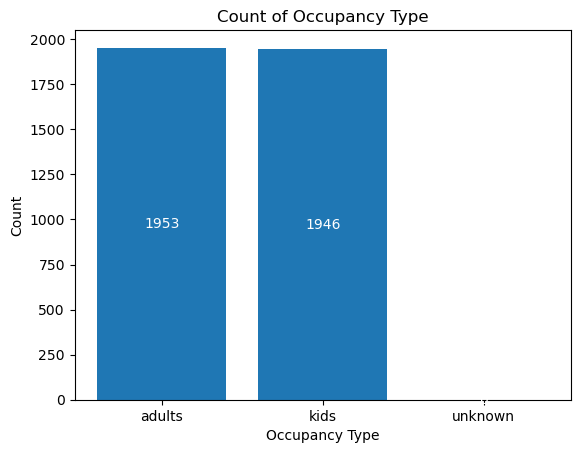

In [38]:
# EDA for occupancy
adult_count = df['adults'].sum()
kid_count = df['kids'].sum()

counts = [adult_count, kid_count, unknown_count]

plt.bar(occupancy_type, counts)

for i in range(len(occupancy_type)):
    plt.text(occupancy_type[i], counts[i]/2, str(counts[i]), ha='center', va='center', color='white')

plt.xlabel('Occupancy Type')
plt.ylabel('Count')
plt.title('Count of Occupancy Type')
plt.show()

In [39]:
# How does occupancy affect the room price of a property?
# Linear regression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [40]:
df['cleaned_price'].info()
df['adults'].info()
df['kids'].info()

<class 'pandas.core.series.Series'>
Index: 1139 entries, 0 to 1138
Series name: cleaned_price
Non-Null Count  Dtype
--------------  -----
1139 non-null   int64
dtypes: int64(1)
memory usage: 17.8 KB
<class 'pandas.core.series.Series'>
Index: 1139 entries, 0 to 1138
Series name: adults
Non-Null Count  Dtype
--------------  -----
1139 non-null   int64
dtypes: int64(1)
memory usage: 17.8 KB
<class 'pandas.core.series.Series'>
Index: 1139 entries, 0 to 1138
Series name: kids
Non-Null Count  Dtype
--------------  -----
1139 non-null   int64
dtypes: int64(1)
memory usage: 17.8 KB


In [41]:
X = df[['adults', 'kids']]
y = df['cleaned_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
lr_model = sm.OLS(y, sm.add_constant(X)).fit()
print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:          cleaned_price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     20.73
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.43e-09
Time:                        18:34:20   Log-Likelihood:                -11141.
No. Observations:                1139   AIC:                         2.229e+04
Df Residuals:                    1136   BIC:                         2.230e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1599.2478    422.282      3.787      0.0

Linear regression equation is: 
y = 1599.25 + (630.15 * x1) + (-288.67 * x2)
Adults has a p-value of 0.000 which is statistically significant since it is less than 0.05. While kids has a p-value of 0.202 which is not statistically significant. Meaning that kids has does have as strong influence on room prices. 

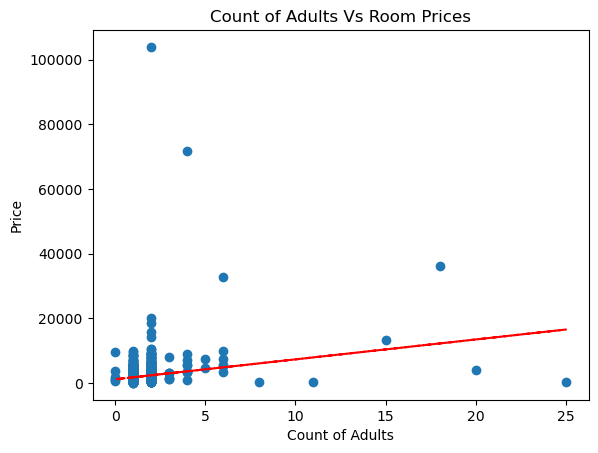

In [46]:
# max_row_index = y.idxmax()
# print(df.loc[max_row_index])
plt.scatter(df['adults'], y)

# Trendline
z = np.polyfit(df['adults'], y, 1)
p = np.poly1d(z)

plt.plot(df['adults'], p(df['adults']), "r--")


plt.xlabel('Count of Adults')
plt.ylabel('Price')
plt.title('Count of Adults Vs Room Prices')
plt.show()

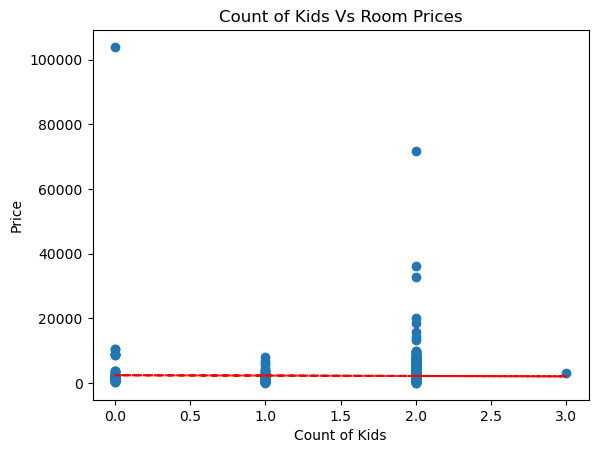

In [45]:
plt.scatter(df['kids'], y)

# Trendline
z = np.polyfit(df['kids'], y, 1)
p = np.poly1d(z)

plt.plot(df['kids'], p(df['kids']), "r--")

plt.xlabel('Count of Kids')
plt.ylabel('Price')
plt.title('Count of Kids Vs Room Prices')
plt.show()